## Imports

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

## Train

In [3]:
train_set = pd.read_csv('train/train_encoded_sin_location.csv')
train_set.head(10)

,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,keyword_8,id,len_text,len_text_original,diff_len_text,text_sum,text_min,text_max,text_mean,text_median,target
0,0,0,0,0,0,0,0,1,1,43,69,26,2.745943,0.224894,0.474996,0.343243,0.323476,1
1,0,0,0,0,0,0,0,1,4,36,38,2,2.545323,0.211650,0.508967,0.363618,0.340166,1
2,0,0,0,0,0,0,0,1,5,72,133,61,3.925010,0.153758,0.585124,0.327084,0.256037,1
3,0,0,0,0,0,0,0,1,6,50,65,15,2.515355,0.150085,0.574226,0.359336,0.346962,1
4,0,0,0,0,0,0,0,1,7,52,88,36,2.937988,0.247769,0.444024,0.326443,0.287533,1
5,0,0,0,0,0,0,0,1,8,84,110,26,3.472170,0.094812,0.392155,0.267090,0.268381,1
6,0,0,0,0,0,0,0,1,10,74,95,21,3.652263,0.211903,0.421501,0.304355,0.292368,1
7,0,0,0,0,0,0,0,1,13,21,59,38,2.169400,0.288043,0.580492,0.433880,0.410864,1
8,0,0,0,0,0,0,0,1,14,38,79,41,2.425554,0.344773,0.491582,0.404259,0.389401,1
9,0,0,0,0,0,0,0,1,15,24,52,28,1.966376,0.391599,0.639305,0.491594,0.467736,1


In [12]:
train_set.drop('id', axis=1, inplace=True)

### Random Forest

In [13]:
X, y = train_set.iloc[:,:-1],train_set.iloc[:,-1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Random Search

In [19]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [20, 50, 70, 100]
max_features = ['auto'] #'log2'
max_depth = [20, 50, 70]
min_samples_split = [5, 50, 100]
min_samples_leaf = [20]

random_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [20]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(),\
                               param_distributions=random_search, n_iter=30, cv=7, random_state=111)

In [21]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [20, 50, 70],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [20],
                                        'min_samples_split': [5, 50, 100],
                                        'n_estimators': [20, 50, 70, 100]},
                   random_state=111)

In [22]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 20,
 'max_features': 'auto',
 'max_depth': 70}

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=20, max_depth=70)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
acc = np.sqrt(accuracy_score(y_test, preds))
print("Accuracy Score: %f" % (acc))

Accuracy Score: 0.813901


In [15]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=50, min_samples_leaf=20, max_depth=70)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
acc = np.sqrt(accuracy_score(y_test, preds))
print("Accuracy Score: %f" % (acc))

Accuracy Score: 0.810937


In [16]:
rf_model = RandomForestClassifier(n_estimators=57, min_samples_split=4, max_depth=70, random_state=111)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
acc = np.sqrt(accuracy_score(y_test, preds))
print("Accuracy Score: %f" % (acc))

Accuracy Score: 0.817122


In [17]:
rf_model = RandomForestClassifier(n_estimators=57, min_samples_split=4, max_depth=30, min_samples_leaf=5, random_state=111)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
acc = np.sqrt(accuracy_score(y_test, preds))
print("Accuracy Score: %f" % (acc))

Accuracy Score: 0.820864


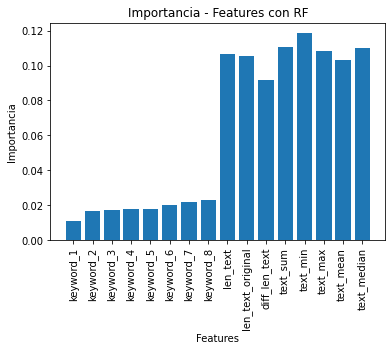

In [18]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features con RF')
plt.show()

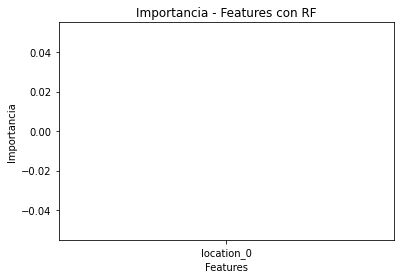

In [29]:
plt.bar(X_train.columns[rf_model.feature_importances_.argmin()], rf_model.feature_importances_.min())
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features con RF')
plt.show()

### Test

In [25]:
test_set = pd.read_csv('test/test_encoded_sin_location.csv')

In [26]:
test_set.head(10)

,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,keyword_8,id,len_text,text_sum,text_min,text_max,text_mean,text_median
0,0,0,0,0,0,0,0,1,0,23,1.979137,0.424578,0.615103,0.494784,0.469728
1,0,0,0,0,0,0,0,1,2,45,2.638767,0.342961,0.426320,0.376967,0.369029
2,0,0,0,0,0,0,0,1,3,53,3.066710,0.187362,0.422860,0.306671,0.307269
3,0,0,0,0,0,0,0,1,9,30,1.958828,0.407703,0.662541,0.489707,0.444292
4,0,0,0,0,0,0,0,1,11,40,2.346990,0.151011,0.524219,0.391165,0.416631
5,0,0,0,0,0,0,0,1,12,15,1.387471,0.556874,0.830597,0.693736,0.693736
6,0,0,0,0,0,0,0,1,21,50,3.254028,0.201604,0.700242,0.361559,0.282634
7,0,0,0,0,0,0,0,1,22,3,1.000000,1.000000,1.000000,1.000000,1.000000
8,0,0,0,0,0,0,0,1,27,8,1.413128,0.678867,0.734261,0.706564,0.706564
9,0,0,0,0,0,0,0,1,29,4,1.000000,1.000000,1.000000,1.000000,1.000000


# PROBAR CON BEST_PARAMS

In [29]:
preds = rf_model.predict(test_set)
preds

array([0, 0, 1, ..., 1, 1, 1])

In [30]:
print(len(preds))
test_set['target'] = preds
test_set[['id', 'target']]

3263


,id,target
0,0,0
1,2,0
2,3,1
3,9,0
4,11,0
...,...,...
3258,10861,1
3259,10865,0
3260,10868,1
3261,10874,1


### Resultado

In [31]:
test_set[['id', 'target']].to_csv('result_rf_sin_location.csv', header=True, index=False)